# Анализ бизнес-показателей
**Цель - выяснить почему компания терпит убытки при огромных вложениях в рекламу.**


Описание проекта
Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

    лог сервера с данными об их посещениях,
    выгрузка их покупок за этот период,
    рекламные расходы.

Вам предстоит изучить:

    откуда приходят пользователи и какими устройствами они пользуются,
    сколько стоит привлечение пользователей из различных рекламных каналов;
    сколько денег приносит каждый клиент,
    когда расходы на привлечение клиента окупаются,
    какие факторы мешают привлечению клиентов.

**Описание данных**

В вашем распоряжении три датасета. Файл `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта, `orders_info_short.csv` — информацию о заказах, а `costs_info_short.csv` — информацию о расходах на рекламу.
Структура `visits_info_short.csv`:

    `User Id` — уникальный идентификатор пользователя,
    `Region` — страна пользователя,
    `Device` — тип устройства пользователя,
    `Channel` — идентификатор источника перехода,
    `Session Start` — дата и время начала сессии,
    `Session End` — дата и время окончания сессии.
    
Структура `orders_info_short.csv`:

    `User Id` — уникальный идентификатор пользователя,
    `Event Dt` — дата и время покупки,
    `Revenue` — сумма заказа.
    
Структура `costs_info_short.csv`:

    `dt` — дата проведения рекламной кампании,
    `Channel` — идентификатор рекламного источника,
    `costs` — расходы на эту кампанию.

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. 
- заказы: `/datasets/orders_info_short.csv`. 
- расходы: `/datasets/costs_info_short.csv`. 

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
# подключаем необходимые библиотеки, загружаем данные в переменные

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

In [2]:
# делаем красиво - все числа типа float отображаются в формате .ххх (три знака после запятой)
pd.options.display.float_format = '{:.3f}'.format 

# Изучаем данные и выполняем предобработку датасета visits

In [3]:
# выводим первые 10 строчек 

visits.head(10)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


In [4]:
# Выводим основную информацию о датафрейме с помощью метода info()

visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
# приводим название столбцов к одному стилю - snake_case 

visits = visits.rename(columns = {'User Id' : 'user_id', 'Region' : 'region', 'Device' : 'device', 'Channel' : 'channel', 'Session Start' : 'session_start', 'Session End' : 'session_end'})

In [6]:
# проверка переименования столбцов
visits.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

In [7]:
# менеям тип object на datetime

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Все последовательно</div>

In [8]:
# смотрим пропуски

visits.isna().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

In [9]:
# Проверка уникальных значений

visits['device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [10]:
# Проверка уникальных значений

visits['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [11]:
# Проверка уникальных значений

visits['channel'].unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

# Изучаем данные и выполняем предобработку датасета orders

In [12]:
# выводим первые 10 строчек 

orders.head(10)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.990
1,174361394180,2019-05-01 12:24:04,4.990
2,529610067795,2019-05-01 11:34:04,4.990
3,319939546352,2019-05-01 15:34:40,4.990
4,366000285810,2019-05-01 13:59:51,4.990
5,129100331057,2019-05-01 01:56:28,4.990
6,626807144131,2019-05-01 02:39:21,4.990
7,914062168985,2019-05-01 02:02:18,4.990
8,769669137453,2019-05-01 03:39:47,4.990
9,434198630691,2019-05-01 18:16:50,5.990


In [13]:
# Выводим основную информацию о датафрейме с помощью метода info()

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [14]:
# приводим название столбцов к одному стилю - snake_case 

orders = orders.rename(columns = {'User Id' : 'user_id', 'Event Dt' : 'event_dt', 'Revenue' : 'revenue'})

In [15]:
# проверка переименования столбцов

orders.columns

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

In [16]:
# смотрим пропуски

orders.isna().sum()

user_id     0
event_dt    0
revenue     0
dtype: int64

In [17]:
# менеям тип object на datetime

orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [18]:
# менеям тип float64 на float32

orders['revenue'] = orders['revenue'].astype('float32') 

# Изучаем данные и выполняем предобработку датасета costs

In [19]:
# выводим первые 10 строчек 

costs.head(10)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.300
1,2019-05-02,FaceBoom,78.100
2,2019-05-03,FaceBoom,85.800
3,2019-05-04,FaceBoom,136.400
4,2019-05-05,FaceBoom,122.100
5,2019-05-06,FaceBoom,118.800
6,2019-05-07,FaceBoom,101.200
7,2019-05-08,FaceBoom,100.100
8,2019-05-09,FaceBoom,93.500
9,2019-05-10,FaceBoom,104.500


In [20]:
# Выводим основную информацию о датафрейме с помощью метода info()

costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [21]:
# приводим название столбцов к одному стилю - snake_case 

costs = costs.rename(columns = {'Channel' : 'channel'})

In [22]:
# проверка переименования столбцов

costs.columns

Index(['dt', 'channel', 'costs'], dtype='object')

In [23]:
# смотрим пропуски

costs.isna().sum()

dt         0
channel    0
costs      0
dtype: int64

In [24]:
# менеям тип float64 на float32

costs['costs'] = costs['costs'].astype('float32') 

In [25]:
# менеям тип object на datetime

costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

In [26]:
# Проверка уникальных значений

costs['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

Вывод: файлы загружен, выведены первые строки, исправлены названия столбцов и изменены типы данных там, где это необходимо, аномалий и повторов не обнаружено.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [27]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [28]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [29]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [30]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [31]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [32]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=14):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [33]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=14):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [34]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=14):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(15,10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

Получаем профили пользователей. Для этого вызовем функцию get_profiles(), передав ей данные о посещениях, покупках, и тратах на рекламу.

In [35]:
profiles = get_profiles(visits, orders, costs)
print(profiles.head(5)) 

    user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True             1.088  
1  2019-07-09 2019-07-01  False             1.107  
2  2019-10-01 2019-10-01  False             0.000  
3  2019-08-22 2019-08-01  False             0.988  
4  2019-10-02 2019-10-01  False             0.231  


In [36]:
profiles['first_ts'].min()

Timestamp('2019-05-01 00:00:41')

In [37]:
profiles['first_ts'].max()

Timestamp('2019-10-27 23:59:04')

Минимальная дата привлечения пользователя - 2019-05-01; максимальная - 2019-10-27.

Строим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [38]:
df_payers_by_region = profiles.pivot_table(index = 'region', values = 'payer', 
                            aggfunc = ['count', 'sum', 'mean'])
df_payers_by_region.columns = ['Кол-во пользователей', 'Кол-во платящих', 'Доля платящих']
df_payers_by_region.sort_values(by='Доля платящих', ascending=False)

,Кол-во пользователей,Кол-во платящих,Доля платящих
region,,,
United States,100002,6902,0.069
Germany,14981,616,0.041
UK,17575,700,0.040
France,17450,663,0.038


Вывод: 1) пользователи приходят из следующих стран - США, Германия, Великобритания и Франция. 2)Больше всего платящих пользователей в США - почти 7%.

Строим таблицу, отражающую количество пользователей и долю платящих для каждого устройства:

In [39]:
df_payers_by_device = profiles.pivot_table(index = 'device', values = 'payer', 
                            aggfunc = ['count', 'sum', 'mean'])
df_payers_by_device.columns = ['Кол-во пользователей', 'Кол-во платящих', 'Доля платящих']
df_payers_by_device.sort_values(by='Доля платящих', ascending=False)

,Кол-во пользователей,Кол-во платящих,Доля платящих
device,,,
Mac,30042,1912,0.064
iPhone,54479,3382,0.062
Android,35032,2050,0.059
PC,30455,1537,0.050


Вывод: 1) клиенты пользуются следующими устройствами - Mac, IPhone, Android и PC. 2) Платящие пользователи предпочитают пользоватся Mac и IPhone.

Строим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [40]:
df_payers_by_channel = profiles.pivot_table(index = 'channel', values = 'payer', 
                            aggfunc = ['count', 'sum', 'mean'])
df_payers_by_channel.columns = ['Кол-во пользователей', 'Кол-во платящих', 'Доля платящих']
df_payers_by_channel.sort_values(by='Доля платящих', ascending=False)

,Кол-во пользователей,Кол-во платящих,Доля платящих
channel,,,
FaceBoom,29144,3557,0.122
AdNonSense,3880,440,0.113
lambdaMediaAds,2149,225,0.105
TipTop,19561,1878,0.096
RocketSuperAds,4448,352,0.079
WahooNetBanner,8553,453,0.053
YRabbit,4312,165,0.038
MediaTornado,4364,156,0.036
LeapBob,8553,262,0.031


Вывод: больше всего платящих пользователей пришло из канала "FaceBoom" - 12.2%. На втором месте "AdNonSense" - 11.3%. На третьем месте "lambdaMediaAds" - 10.5%. Остальные каналы принесли менее 10% платящих пользователей. Меньше всего пользователей сами нашли приложение ("Organic") - 2.1%.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [41]:
acquisition_cost_sum = profiles['acquisition_cost'].sum()
acquisition_cost_sum

105497.29996615648

Общая сумма расходов на маркетинг составила $105,497.30.

Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [42]:
df_acquisition_cost_per_user = profiles.pivot_table(index = 'channel', values = 'acquisition_cost', 
                            aggfunc = ['sum'])
df_acquisition_cost_per_user.columns = ['Сумма затрат']
#df_acquisition_cost.style.format({'Доля платящих': '{:.2%}'})
df_acquisition_cost_per_user.sort_values(by='Сумма затрат', ascending=False)

,Сумма затрат
channel,
TipTop,54751.300
FaceBoom,32445.600
WahooNetBanner,5151.000
AdNonSense,3911.250
OppleCreativeMedia,2151.250
RocketSuperAds,1833.000
LeapBob,1797.600
lambdaMediaAds,1557.600
MediaTornado,954.480


Вывод: больше всего денег было вложено в канал "TipTop", но он принес не больше всего платящих пользователей. Этот канал на 4м месте по привлечение платящих клиентов. А вот на "FaceBoom" было потрачено значительно меньше средств, но в тоже время этот канал первый по привлечению платящих пользователей. Аналогично с каналом "lambdaMediaAds" - он третий по привлечению платящих клиентов, но на него потрачено в 35 раз меньше, чем на "TipTop".

Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.

In [43]:
cac = costs.pivot_table(index='dt', columns='channel', values='costs', aggfunc='mean')

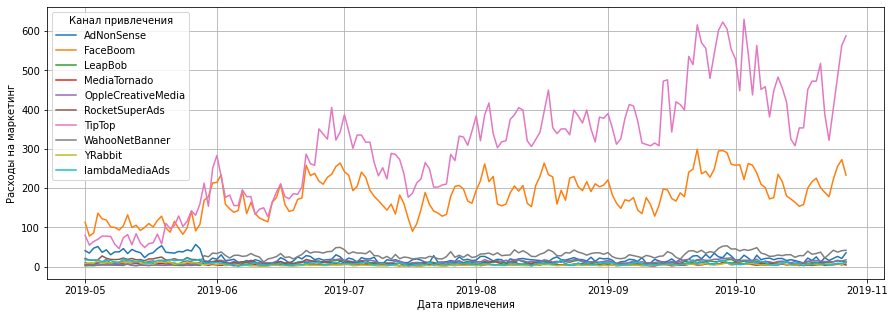

In [44]:
cac.plot(grid=True, figsize=(15,5));
plt.xlabel('Дата привлечения');
plt.ylabel('Расходы на маркетинг');
plt.legend(title='Канал привлечения');

Вывод: расходы на не очень успешный канал привлечения "TipTop" постоянно растут, а на расходы на самый успешный канал "FaceBoom" в среднем без особых изменений. Это говорит о том, что с каналом "TipTop" что-то не так.


Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

In [45]:
df_acquisition_cost = profiles.pivot_table(index = 'channel', values = 'acquisition_cost', 
                            aggfunc = ['mean'])
df_acquisition_cost.columns = ['CAC']

df_acquisition_cost.sort_values(by='CAC', ascending=False)

,CAC
channel,
TipTop,2.799
FaceBoom,1.113
AdNonSense,1.008
lambdaMediaAds,0.725
WahooNetBanner,0.602
RocketSuperAds,0.412
OppleCreativeMedia,0.250
YRabbit,0.219
MediaTornado,0.219


Вывод: как и ожидалось стоимость привлечения одного клиента из канала "TipTop" самая высокая - более чем в два раза по сравнению с каналом "FaceBoom".

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

Установим момент и горизонт анализа данных.

In [46]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

In [47]:
profiles = profiles.query('channel != "organic"')

Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.

In [48]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days)

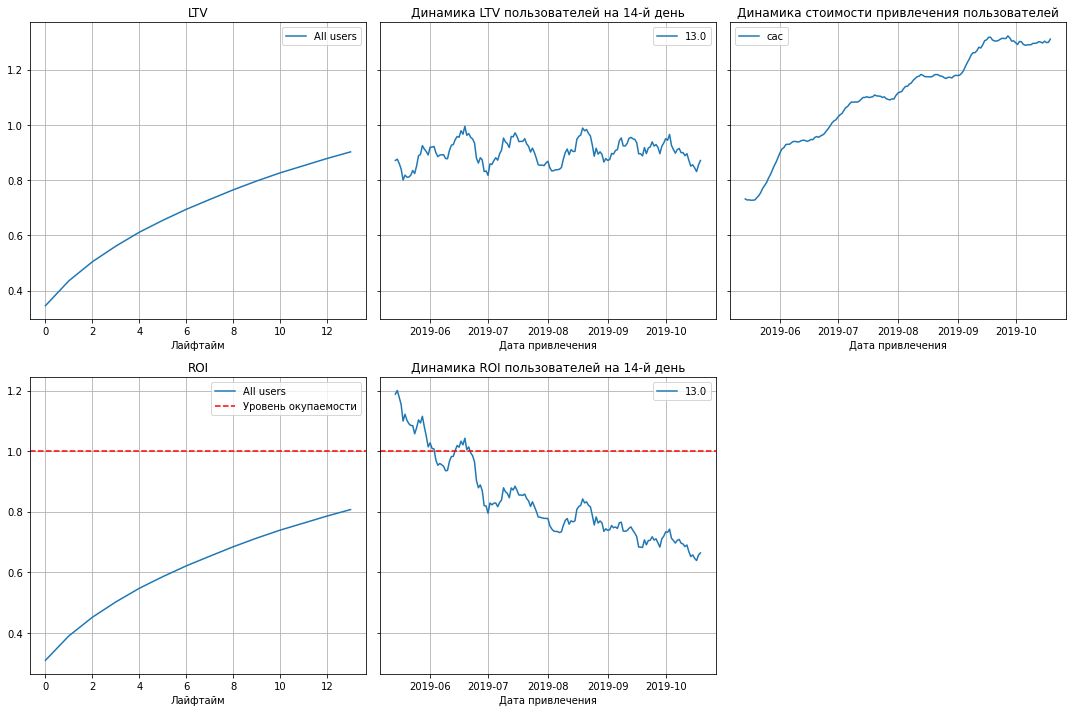

In [49]:
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Вывод: 1) реклама не окупается, ROI в конце 14 дня - чуть выше 80%. 2) Стоиомость привлечения пользователей (CAC) постоянно растет, возможно, проблема в постоянном увеличении рекламного бюджета. 3) LTV достаточно стабилен.

Проверим конверсию и удержание пользователей и динамику их изменения.

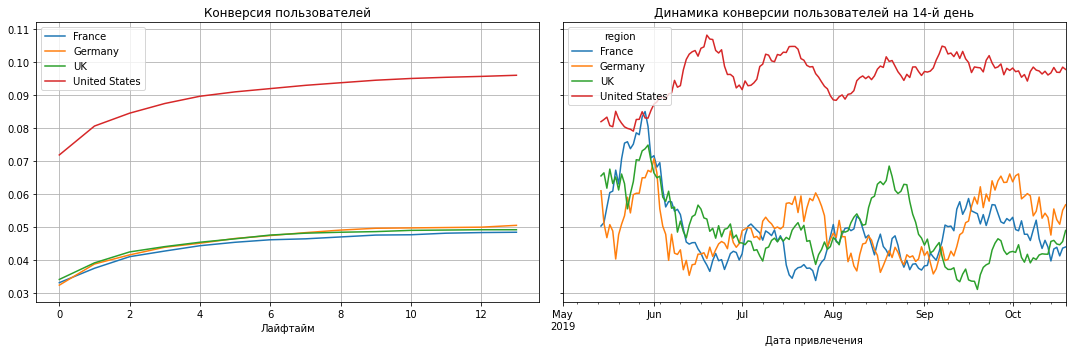

In [50]:
# смотрим конверсию по странам

dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Вывод: судя по графикам пользователи из США очень хорошо конвертируются. В остальных странах всё более или менее ровно. Посмотрим на удержание клиентов из США.

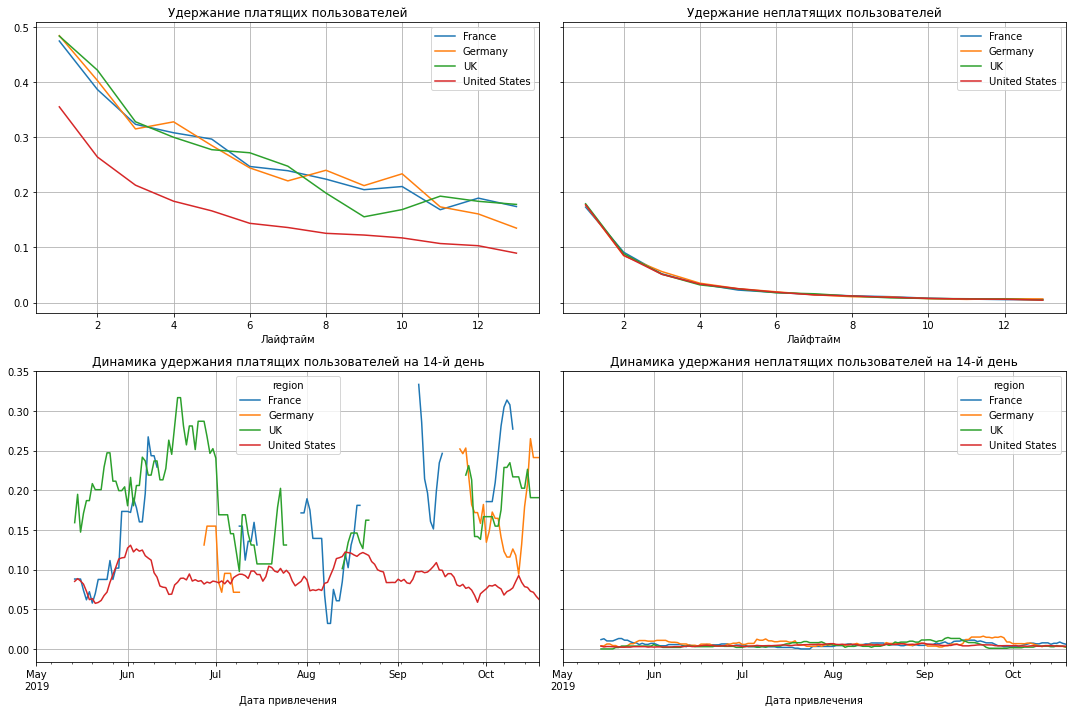

In [51]:
# смотрим удержание по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Вывод: удержание платящих пользователей самое низкое в США. Примерно на 10% хуже, по сравнению с остальными странами.

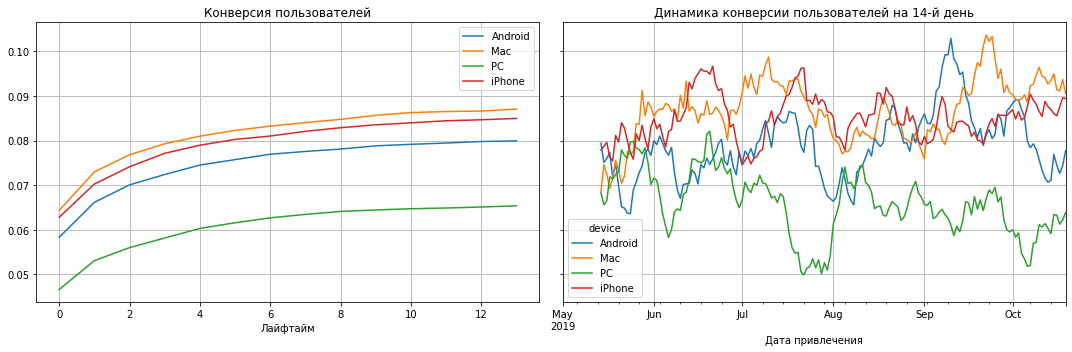

In [52]:
# смотрим конверсию по устройствам

dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Вывод: пользователи PC конвертируются хуже всех, примерно на 15%-20% хуже остальных.

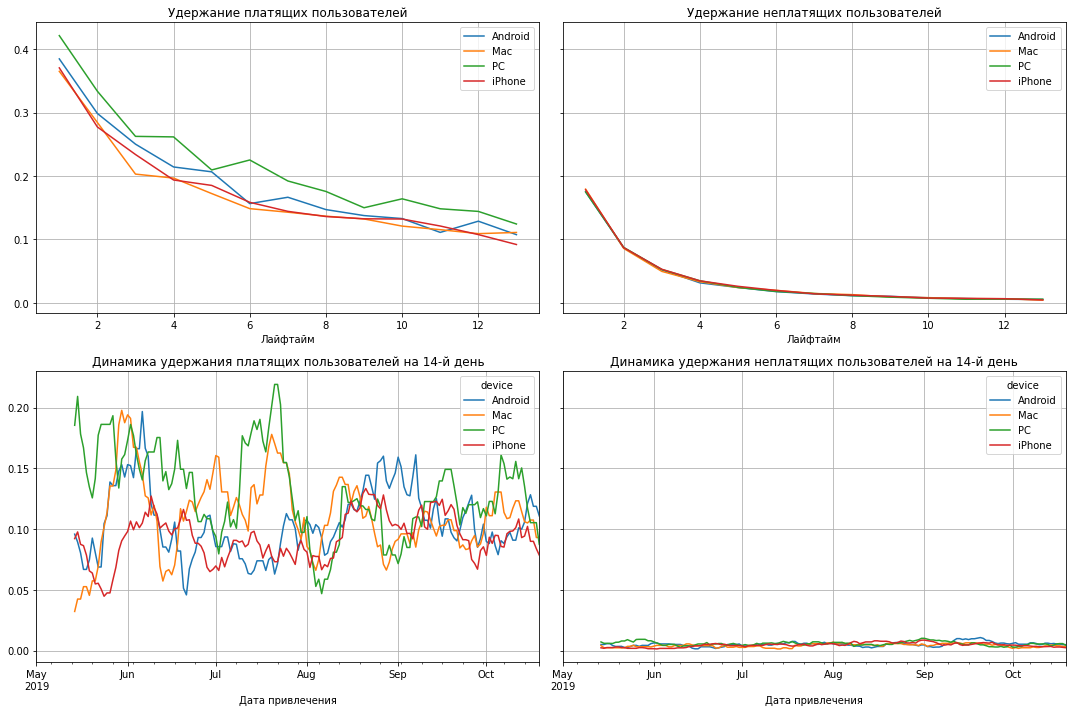

In [53]:
# смотрим удержание по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Вывод: с удержанием всё более или менее у всех ровно.

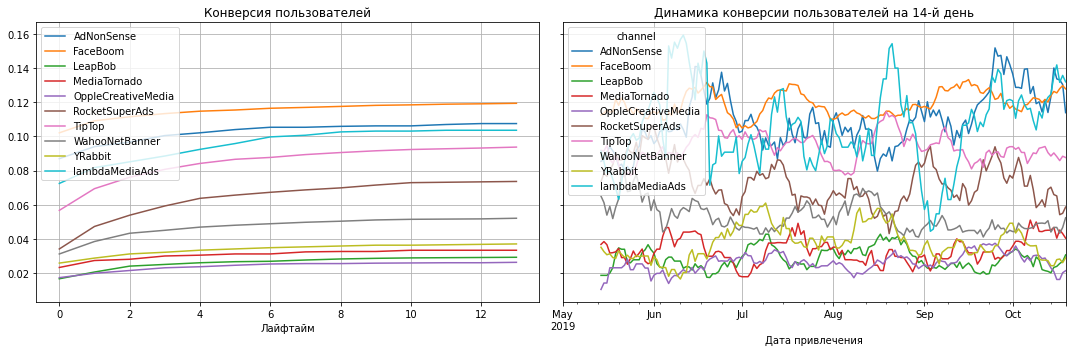

In [54]:
# смотрим конверсию по каналам привлечения

dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Вывод: лучше всех с конверсией у "FaceBoom" - в районе 12%. Также неплохие показатели у "AdNonSense" и "LambdaMediaAds" - выше 10%. Хуже всех у "OppleCreativeMedia", "LeapBob", "MediaTornado" и "YRabbit"- все не преодолели отметку 4%.

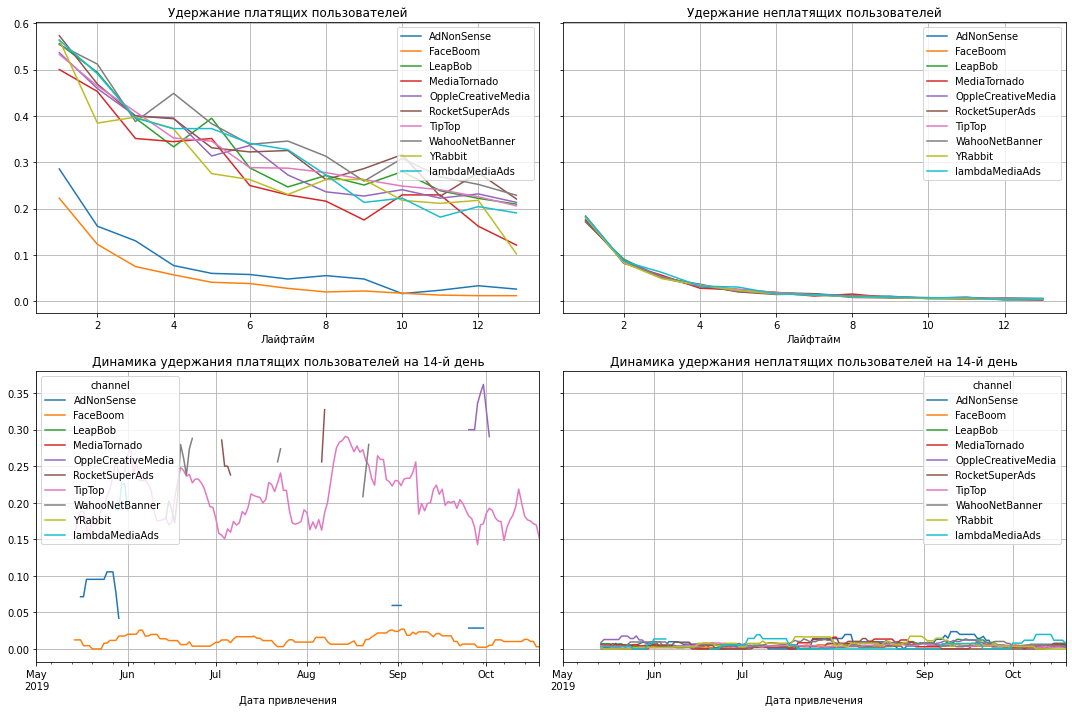

In [55]:
# смотрим удержание по каналам привлечения

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Вывод: с удержанием у всех примерно одинаково, но вот у "FaceBoom" и "AdNonSense" всё значительно хуже - удержание стремится к нулю! 

Проанализируем окупаемость рекламы с разбивкой по странам. 

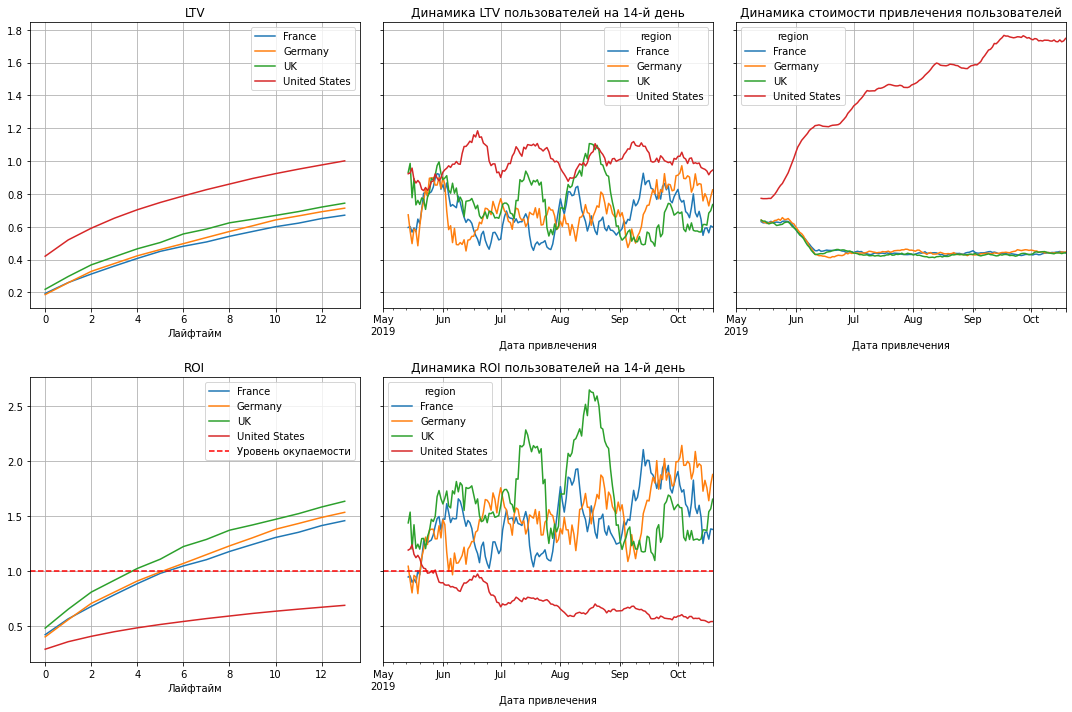

In [56]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Вывод: в США реклама не окупается, в отличии от других стран. Также в США постоянно растут затраты на привлечение клиентов, причем разница с другими странами колоссальная - более 100%! Скорее всего дела в стране. LTV стабилен.

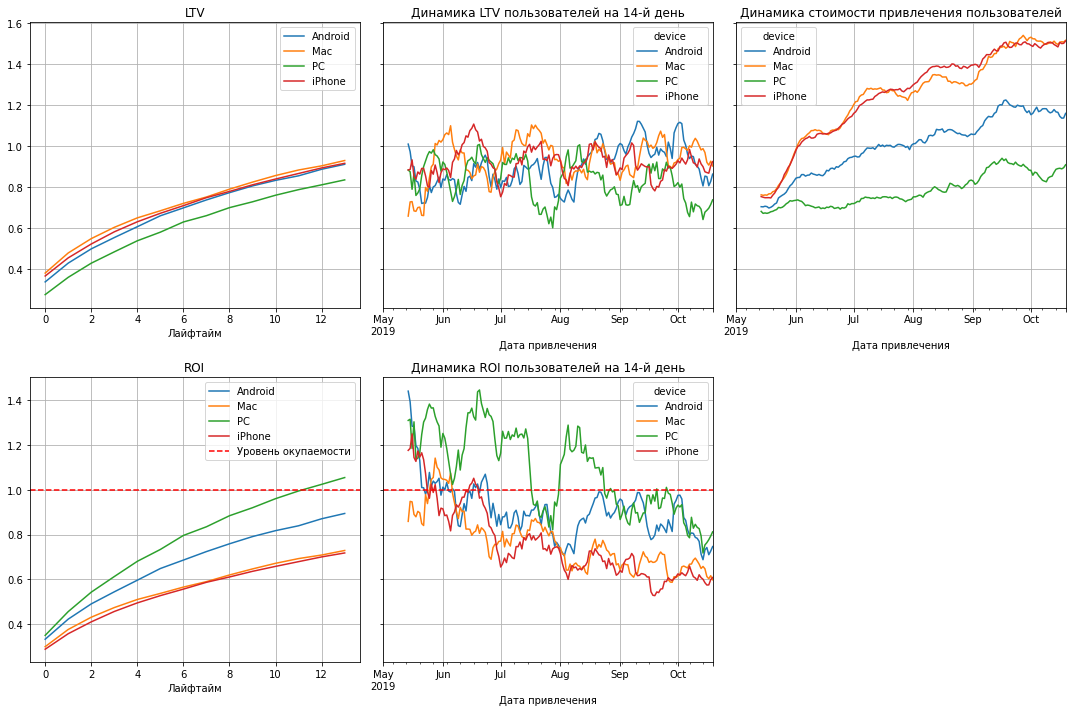

In [57]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Вывод: окупаются, да и то незначительно, только пользователи PC. Остальные - нет.

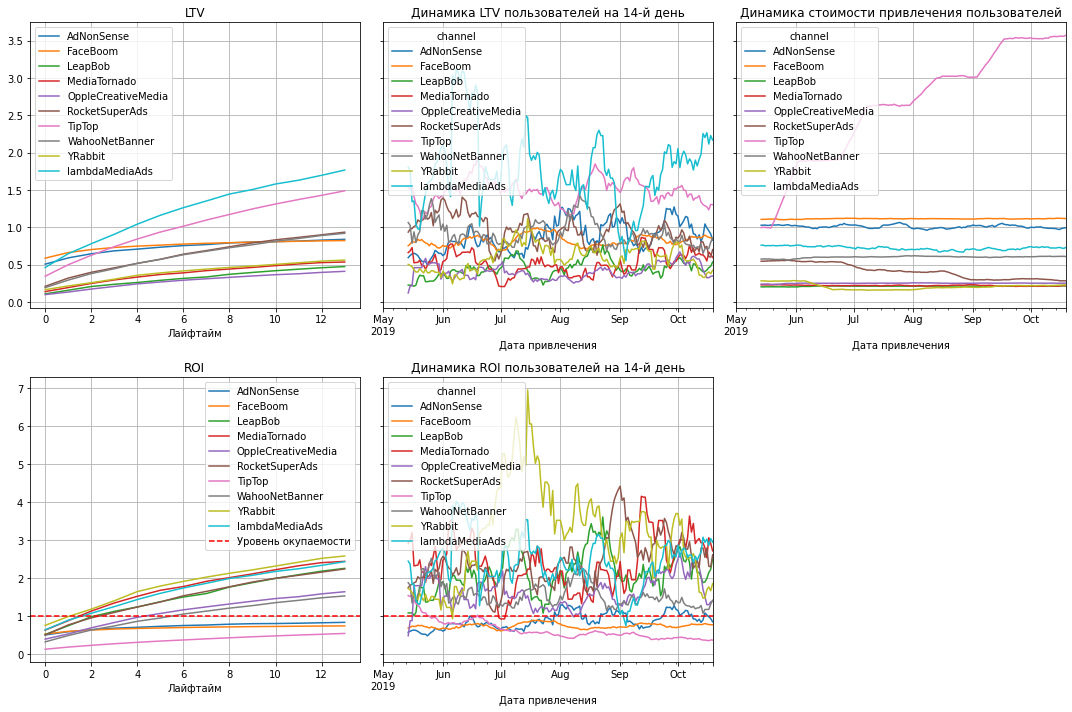

In [58]:
# смотрим окупаемость с разбивкой по каналам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Вывод: реклама не окупается в трех каналах - "AdNonSense", "FaceBoom" и "TipTop". Причём у канала "TipTop" САС в разы выше, чем у других.

1. В целом реклама не окупается.

2. Негативное влияние на окупаемость рекламы оказывают: 1) пользователи из США, 2) пользователи IPhone и Mac - оба устройста компании Apple, 3) значительные затраты на привлечение клиентов через канал "TipTop".

3. Проблемы окупаемости могут быть вызваны: неправильным привлечением пользователей в канале "TipTop", возможно, в этом канале в основном пользователи используют PC и Android, а рекламщики пытаются привлечь пользователей Iphone и Mac.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.


Скорее всего отдел маркетинга неправильно таргетирует рекламу: в каналах пользователи одних устройств, а они рассчитывают на других пользователей. Также возможной причиной может быть географический аспект - реклама для ползователей из Европы окупается.

- Сформулируйте рекомендации для отдела маркетинга.

Проверить все каналы, которые не окупаются, на предмет того какие пользователи приходят через него (каким устройством пользуются, на тех ли пользователей таргетирована реклама, из какой они страны). И сделать тоже самое с каналами, которые окупаются. Потом сравнить и понять, почему каналы были неуспешными. **Менеджерам стоит обратить внимание на канал "TipTop" - У него самый высокий САС, реклама не окупается при том, что в этот канал вложили более 50% от всего рекламного бюджета - здесь явно что-то не так. Также стоить проверить каналы "FaceBoom" и "AdNonSens" - реклама не окупается, САС у них самый высокий (после "TipTop"), Retention rate стремится к нулю. В канал "FaceBoom" вложили более 30% рекламного бюджета. Получается, что  более 80% рекламного бюджета вложили в самые неудачные каналы. Необходимо перераспределить бюджет и сконцентрироваться на каналах, реклама которых окупается, например, "lambdaMediaAds" - в этот канал вложено всего навсего 1,5% от бюджета на рекламу, но у этого канала высокий LTV, небольшой САС (0.7USD), также доля платящих пользователей в этом канале превышает 10%, платящие клиенты хорошо удерживаются.**

**Также рекламщикам стоит обратить внимание на способы привлечения пользователей устройств IPhone и Mac и клиентов из США.**